In [2]:
#Import necessary functions
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime as dt
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder


%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Read in CSV and assign DateTime Index
df = pd.read_csv('data/Final_Motor_Vehicle_Collisions_QuBr_2018-2023_V1.csv')
df.head()

,CRASH DATE TIME,COLLISION_ID,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1,CONTRIBUTING CATEGORY V1,SEASON,TIME OF DAY,IS RUSH HOUR
0,2018-01-01 00:00:00,3820851,BROOKLYN,11239,40.65306,-73.88202,0,0,Driver Inattention/Distraction,Sedan,Driver Error,Winter,Late Night,False
1,2018-01-01 00:00:00,3820945,BROOKLYN,11234,40.62877,-73.91825,1,0,Failure to Yield Right-of-Way,Sedan,Moving Violation,Winter,Late Night,False
2,2018-01-01 00:00:00,3819067,QUEENS,11419,40.68297,-73.82824,0,0,Passing Too Closely,Sedan,Moving Violation,Winter,Late Night,False
3,2018-01-01 00:00:00,3822296,BROOKLYN,11230,40.62418,-73.97048,0,0,Driver Inattention/Distraction,Station Wagon/Sport Utility Vehicle,Driver Error,Winter,Late Night,False
4,2018-01-01 00:00:00,3821055,BROOKLYN,11230,40.62322,-73.96102,0,0,Driver Inattention/Distraction,Taxi,Driver Error,Winter,Late Night,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213962 entries, 0 to 213961
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH DATE TIME                213962 non-null  object 
 1   COLLISION_ID                   213962 non-null  int64  
 2   BOROUGH                        213962 non-null  object 
 3   ZIP CODE                       213962 non-null  int64  
 4   LATITUDE                       213962 non-null  float64
 5   LONGITUDE                      213962 non-null  float64
 6   NUMBER OF PERSONS INJURED      213962 non-null  int64  
 7   NUMBER OF PERSONS KILLED       213962 non-null  int64  
 8   CONTRIBUTING FACTOR VEHICLE 1  213962 non-null  object 
 9   VEHICLE TYPE CODE 1            213962 non-null  object 
 10  CONTRIBUTING CATEGORY V1       213962 non-null  object 
 11  SEASON                         213962 non-null  object 
 12  TIME OF DAY                   

In [5]:
#Change column to datetime datatype
#df['CRASH DATE TIME'] = pd.to_datetime(df['CRASH DATE TIME'])

In [6]:
#Read in CSV and assign DateTime Index
#df = pd.read_csv('data/Final_Motor_Vehicle_Collisions_QuBr_2018-2023.csv', index_col='CRASH DATE TIME', parse_dates=True)
#df.head()

In [7]:
#Create copy of dataframe
df2 = df.copy()

In [8]:
#Dummy the contributing category of vehicle 1
df_dummy = pd.get_dummies(data=df2, columns=['CONTRIBUTING CATEGORY V1', 'TIME OF DAY'])


#Add the dummie variables back to the main dataframe
df_dummy=pd.concat([df2, df_dummy], axis=1)

#Drop the V1 category and dummy variables besides Driver Error
#df_dummy.drop(['CONTRIBUTING CATEGORY V1', 'Bodily Impairment', 'Environmental Factors', 'Moving Violation', 
#              'Other Distractions', 'Road Conditions', 'Third-Party (Non-Vehicular)', 'Third-Party (Vehicular)',
#              'Vehicle Defects', 'Internal Electronics Usage'], inplace=True, axis=1)

df_dummy

,CRASH DATE TIME,COLLISION_ID,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1,...,TIME OF DAY_Afternoon,TIME OF DAY_Dawn,TIME OF DAY_Early AM,TIME OF DAY_Early Afternoon,TIME OF DAY_Early Morning,TIME OF DAY_Evening,TIME OF DAY_Late Morning,TIME OF DAY_Late Night,TIME OF DAY_Morning,TIME OF DAY_Night
0,2018-01-01 00:00:00,3820851,BROOKLYN,11239,40.653060,-73.882020,0,0,Driver Inattention/Distraction,Sedan,...,0,0,0,0,0,0,0,1,0,0
1,2018-01-01 00:00:00,3820945,BROOKLYN,11234,40.628770,-73.918250,1,0,Failure to Yield Right-of-Way,Sedan,...,0,0,0,0,0,0,0,1,0,0
2,2018-01-01 00:00:00,3819067,QUEENS,11419,40.682970,-73.828240,0,0,Passing Too Closely,Sedan,...,0,0,0,0,0,0,0,1,0,0
3,2018-01-01 00:00:00,3822296,BROOKLYN,11230,40.624180,-73.970480,0,0,Driver Inattention/Distraction,Station Wagon/Sport Utility Vehicle,...,0,0,0,0,0,0,0,1,0,0
4,2018-01-01 00:00:00,3821055,BROOKLYN,11230,40.623220,-73.961020,0,0,Driver Inattention/Distraction,Taxi,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213957,2022-12-31 22:02:00,4594338,QUEENS,11102,40.766150,-73.919785,2,0,Following Too Closely,Sedan,...,0,0,0,0,0,0,0,0,0,1
213958,2022-12-31 22:10:00,4594636,BROOKLYN,11221,40.697582,-73.929830,0,0,Passing or Lane Usage Improper,Station Wagon/Sport Utility Vehicle,...,0,0,0,0,0,0,0,0,0,1
213959,2022-12-31 23:20:00,4594416,QUEENS,11369,40.760098,-73.859300,2,0,Alcohol Involvement,Station Wagon/Sport Utility Vehicle,...,0,0,0,0,0,0,0,0,0,1
213960,2022-12-31 23:40:00,4594910,BROOKLYN,11249,40.699482,-73.961040,1,0,Driver Inattention/Distraction,Sedan,...,0,0,0,0,0,0,0,0,0,1


In [9]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213962 entries, 0 to 213961
Data columns (total 46 columns):
 #   Column                                                Non-Null Count   Dtype  
---  ------                                                --------------   -----  
 0   CRASH DATE TIME                                       213962 non-null  object 
 1   COLLISION_ID                                          213962 non-null  int64  
 2   BOROUGH                                               213962 non-null  object 
 3   ZIP CODE                                              213962 non-null  int64  
 4   LATITUDE                                              213962 non-null  float64
 5   LONGITUDE                                             213962 non-null  float64
 6   NUMBER OF PERSONS INJURED                             213962 non-null  int64  
 7   NUMBER OF PERSONS KILLED                              213962 non-null  int64  
 8   CONTRIBUTING FACTOR VEHICLE 1               

In [10]:
df_data = df_dummy[['ZIP CODE','NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED','CONTRIBUTING CATEGORY V1_Driver Error','TIME OF DAY_Night']]
df_data

,ZIP CODE,ZIP CODE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PERSONS KILLED,CONTRIBUTING CATEGORY V1_Driver Error,TIME OF DAY_Night
0,11239,11239,0,0,0,0,1,0
1,11234,11234,1,1,0,0,0,0
2,11419,11419,0,0,0,0,0,0
3,11230,11230,0,0,0,0,1,0
4,11230,11230,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
213957,11102,11102,2,2,0,0,0,1
213958,11221,11221,0,0,0,0,0,1
213959,11369,11369,2,2,0,0,0,1
213960,11249,11249,1,1,0,0,1,1


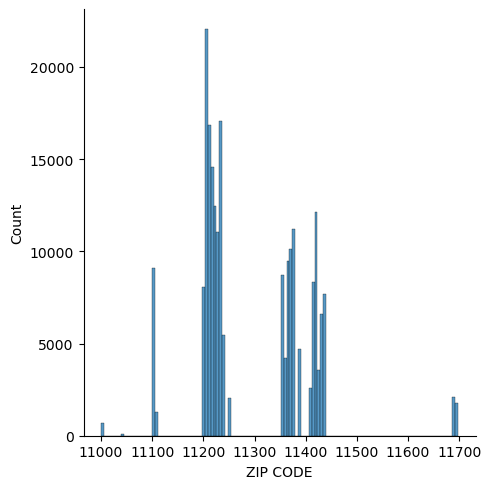

In [11]:
sns.displot(x='ZIP CODE', data=df);

In [12]:
#Count of collisions caused by driver error vs other cause
#sns.countplot(x='Driver Error', data=df_dummy);

In [13]:
#Count of collisions caused by driver error vs other cause -- broken down by borough
#sns.countplot(x='CONTRIBUTING CATEGORY V1_Driver Error', data=df_dummy, hue='BOROUGH');

In [14]:
#Count of collisions caused by driver error vs other cause -- broken down by num of ppl injured
#sns.countplot(x='Driver Error', data=df_dummy, hue='NUMBER OF PERSONS INJURED');

In [15]:
#Count of collisions caused by driver error vs other cause -- broken down by num of people killeda
#sns.countplot(x='Driver Error', data=df_dummy, hue='NUMBER OF PERSONS KILLED');

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213962 entries, 0 to 213961
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH DATE TIME                213962 non-null  object 
 1   COLLISION_ID                   213962 non-null  int64  
 2   BOROUGH                        213962 non-null  object 
 3   ZIP CODE                       213962 non-null  int64  
 4   LATITUDE                       213962 non-null  float64
 5   LONGITUDE                      213962 non-null  float64
 6   NUMBER OF PERSONS INJURED      213962 non-null  int64  
 7   NUMBER OF PERSONS KILLED       213962 non-null  int64  
 8   CONTRIBUTING FACTOR VEHICLE 1  213962 non-null  object 
 9   VEHICLE TYPE CODE 1            213962 non-null  object 
 10  CONTRIBUTING CATEGORY V1       213962 non-null  object 
 11  SEASON                         213962 non-null  object 
 12  TIME OF DAY                   

## Train Test Split

In [17]:
df_data.head()

,ZIP CODE,ZIP CODE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PERSONS KILLED,CONTRIBUTING CATEGORY V1_Driver Error,TIME OF DAY_Night
0,11239,11239,0,0,0,0,1,0
1,11234,11234,1,1,0,0,0,0
2,11419,11419,0,0,0,0,0,0
3,11230,11230,0,0,0,0,1,0
4,11230,11230,0,0,0,0,1,0


In [18]:
#drop duplicate columns
df_data = df_data.loc[:,~df_data.columns.duplicated()].copy()
df_data

,ZIP CODE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING CATEGORY V1_Driver Error,TIME OF DAY_Night
0,11239,0,0,1,0
1,11234,1,0,0,0
2,11419,0,0,0,0
3,11230,0,0,1,0
4,11230,0,0,1,0
...,...,...,...,...,...
213957,11102,2,0,0,1
213958,11221,0,0,0,1
213959,11369,2,0,0,1
213960,11249,1,0,1,1


In [19]:
#Assign X and y
X = df_data.drop('CONTRIBUTING CATEGORY V1_Driver Error', axis=1)
y = df_data['CONTRIBUTING CATEGORY V1_Driver Error']

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Baseline Model
Our baseline model will be a Logistic Regression.

In [20]:
baseline_model = LogisticRegression()
baseline_model.fit(X_train,y_train)

LogisticRegression()

In [21]:
y_pred = baseline_model.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[26165,     0],
       [16628,     0]])

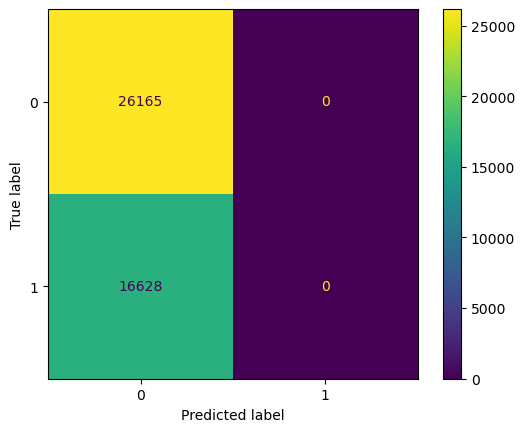

In [23]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(baseline_model, X_test, y_test);

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76     26165
           1       0.00      0.00      0.00     16628

    accuracy                           0.61     42793
   macro avg       0.31      0.50      0.38     42793
weighted avg       0.37      0.61      0.46     42793



The accuracy metric was chosen because we want to focus on how accurately we can predict whether or not an accident was caused by 'Driver Error' or not.

In [25]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)


0.6114317762250835